In [2]:
""" IMDB 영화 리뷰 분류 문제에 적용"""
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

np.load = np_load_old

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

""" 
데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500) 
"""

데이터 로딩...
시퀀스 패딩 (samples x time)


' \n데이터 로딩...\n25000 훈련 시퀀스\n25000 테스트 시퀀스\n시퀀스 패딩 (samples x time)\ninput_train 크기: (25000, 500)\ninput_test 크기: (25000, 500) \n'

In [3]:
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.models import Sequential

#### Model ################################################

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4961 - acc: 0.7722 - val_loss: 0.3949 - val_acc: 0.8272
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.2883 - acc: 0.8836 - val_loss: 0.3583 - val_acc: 0.8484
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1815 - acc: 0.9327 - val_loss: 0.3757 - val_acc: 0.8410
Epoch 4/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1154 - acc: 0.9616 - val_loss: 0.3919 - val_acc: 0.8572
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1129 - acc: 0.9610 - val_loss: 0.4612 - val_acc: 0.8320
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0363 - acc: 0.9913 - val_loss: 0.4740 - val_acc: 0.8400
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0148 - acc: 0.9976 - val_loss: 0.5522 - val_acc:

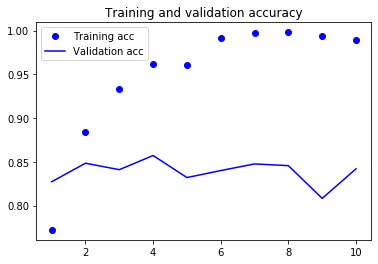

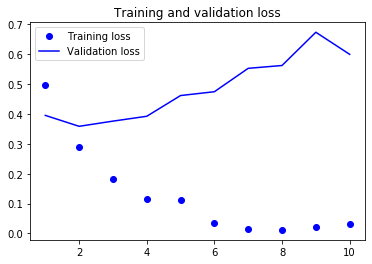

In [5]:
#### Train ################################################
history = model.fit(input_train, y_train,
                   epochs=10, batch_size=128, validation_split=0.2)

############################################################
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()